<a href="https://colab.research.google.com/github/eluvishis/TimeSeriesResearch2020/blob/master/LSTMmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 516.2MB 32kB/s 


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
print(tf.__version__)

2.2.0


In [5]:
print("Num GPUs Available: ", tf.config.experimental.list_physical_devices('GPU'))

Num GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [6]:
import pandas as pd


In [8]:
#url = "https://raw.githubusercontent.com/bharddwaj/Summer2020/master/MSFT.csv"
ibm = pd.read_csv("sample_data/IBM.csv")

In [9]:
ibm.tail()
len(ibm)


2036

In [10]:
ibm_returns = []
for i in range(1,2036):
    current_price = ibm['Adj Close'][i] 
    prev_price = ibm['Adj Close'][i-1]
    stock_returns = current_price/prev_price - 1 # (current_price - prev_price)/prev_price
    ibm_returns.append(stock_returns)

ibm_returns = np.array(ibm_returns)


In [42]:
len(ibm_returns)

2035

In [9]:
print(msft_returns)

[ 0.00632922  0.00202153  0.02084751 ...  0.0076209   0.02152624
 -0.01162789]


In [16]:



def univariate_data(start_index, end_index, history_size, target_size,dataset=ibm_returns):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size]) #training on predicting in the future so need labels in future
  return np.array(data), np.array(labels)

x_train, y_train = univariate_data(0,2024,60,1)

x_test, y_test = univariate_data(1964,2034,60,1)


len(y_test)


10

In [18]:
BATCH_SIZE = 256
#BUFFER_SIZE = 10000

#train_univariate = tf.data.Dataset.from_tensor_slices((x_train, y_train))
#train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

#test_univariate = tf.data.Dataset.from_tensor_slices((x_test, y_test))
#test_univariate = test_univariate.batch(BATCH_SIZE).repeat()

simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape = (x_train.shape[1], 1)),
    tf.keras.layers.Dense(1)
])
print(x_train.shape)

simple_lstm_model.compile(optimizer='adam', loss='mae')

#EVALUATION_INTERVAL = 200 #epoch only runs for 200 steps as opposed to full data as is normal to save time
EPOCHS = 100

simple_lstm_model.fit(x_train, y_train, epochs=EPOCHS,batch_size = BATCH_SIZE) #removed the validation set

#steps_per_epoch=EVALUATION_INTERVAL. (optional argument) validation_steps=50
                      
                      


print(x_test.shape)
print(y_test.shape)
model_predictions = simple_lstm_model.predict(x_test) #2d list [[1],[2],...] one element in each sublist
model_predictions = list(model_predictions)
predictions = []
for i in range(len(model_predictions)):
    predictions.append(model_predictions[i][0])
print(len(predictions))
indices = list(range(len(predictions)))
print(indices)

(1964, 60, 1)
Epoch 1/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0085
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0085
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0084
Epoch 4/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0084
Epoch 5/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0084
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0084
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0085
Epoch 8/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0084
Epoch 9/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0084
Epoch 10/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0084
Epoch 11/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 12/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 13/100
8/8 [=========================

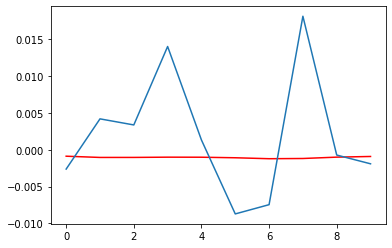

In [19]:
plt.plot(indices,predictions,color='red')
plt.plot(indices,y_test)

In [20]:
def mse(pred,actual):
  '''the length of the predictions and the actual should be the same '''
  return sum(map(lambda x,y: (x - y)**2,pred,actual))/len(pred)

In [21]:
mse(predictions,y_test)

7.531403527625906e-05

In [30]:
print(predictions)

[-0.00011095122, 0.00015912417, -0.00015571938, -0.000501654, -1.5384343e-05, -0.00012287489, 0.00042628194, 0.00065962446, 0.00030539083, 0.00011508833]


In [31]:
print(y_test)

[ 0.00668094 -0.02015754  0.01263647 -0.02001594  0.01074721  0.02554925
  0.00584739  0.0076209   0.02152624 -0.01162789]
